# Ejercicio filas de espera Carrefour
---
- Autor: **[Rodrigo Maranzana](https://www.linkedin.com/in/rodrigo-maranzana/)**
- Año: **2020**
- Licencia: **[MIT License](https://github.com/harb-OR/casos_practicos/blob/master/LICENSE)**
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Funciones-para-métricas-de-M/M/1-y-M/M/s:" data-toc-modified-id="Funciones-para-métricas-de-M/M/1-y-M/M/s:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Funciones para métricas de M/M/1 y M/M/s:</a></span></li><li><span><a href="#Caso-ejemplo" data-toc-modified-id="Caso-ejemplo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Caso ejemplo</a></span></li></ul></div>

In [1]:
from math import factorial
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import pylab as pl
import pandas as pd

### Funciones para métricas de M/M/1 y M/M/s:

Se escriben las funciones directo de las ecuaciones de Ws, Wq, Ls y Lq.

In [2]:
from abc import ABCMeta, abstractmethod
 
class AbstractFila(metaclass=ABCMeta):
    
    @abstractmethod
    def calcular_rho(self):
        raise NotImplementedError("Método no implementado")
    
    ## Cantidad media de personas en la fila:
    @abstractmethod
    def calcular_lq(self):
        raise NotImplementedError("Método no implementado")
    
    ## Tiempo medio de espera en la fila:
    @abstractmethod
    def calcular_wq(self):
        raise NotImplementedError("Método no implementado")
    
    ## Cantidad media de personas en el sistema:
    @abstractmethod
    def calcular_ls(self):
        raise NotImplementedError("Método no implementado")
    
    ## Tiempo medio en el sistema:
    @abstractmethod
    def calcular_ws(self):
        raise NotImplementedError("Método no implementado")

In [3]:
# Clase para fila M/M/1

class FilaMM1(AbstractFila):
    
    def __init__(self, mu, lambd, s=1):
        """
        Parámetro s disponible para s x M/M/1
        """
        self.lambd = lambd
        self.mu = mu
        self.s = s
        self.rho = self.calcular_rho()
        
    def calcular_rho(self):
        assert self.lambd < self.mu, "No se cumple el régimen permanente"
        
        return self.lambd / self.mu
    
    ## Cantidad media de personas en la fila:
    def calcular_lq(self):
        return self.lambd * self.calcular_wq()
    
    ## Tiempo medio de espera en la fila:
    def calcular_wq(self):
        return self.lambd / (self.mu*(self.mu - self.lambd))
    
    ## Cantidad media de personas en el sistema:
    def calcular_ls(self):
        return self.calcular_lq() + self.rho
    
    ## Tiempo medio en el sistema:
    def calcular_ws(self):
        return self.calcular_wq() + 1 / self.mu
    
    def __repr__(self):
        return f"FilaMM1@{id(self)}"
    

In [4]:
class FilaMMS(AbstractFila):
    
    def __init__(self, mu, lambd, s):
        self.lambd = lambd
        self.mu = mu
        self.s = s
        self.rho = self.calcular_rho()
    
    def calcular_rho(self):
        assert self.lambd < (self.s * self.mu), "No se cumple el régimen permanente"
        
        return self.lambd / (self.s * self.mu)
        
    def calcular_p0(self):
        return 1 / ( sum([((self.lambd/self.mu)**i)/factorial(i) for i in range(0, self.s)]) + \
                   ((self.lambd/self.mu)**self.s) / (factorial(self.s) * (1 - self.rho)))

    ## Cantidad media de personas en la fila:
    def calcular_lq(self):
        return (((self.lambd/self.mu)**self.s) * self.rho * self.calcular_p0()) / \
                (factorial(self.s) * ((1 - self.rho)**2))

    ## Tiempo medio de espera en la fila:
    def calcular_wq(self):
        return self.calcular_lq() / self.lambd
    
    ## Cantidad media de personas en el sistema:
    def calcular_ls(self):
        return self.calcular_lq() + (self.lambd / self.mu)
    
    ## Tiempo medio en el sistema:
    def calcular_ws(self):
        return self.calcular_wq() + 1 / self.mu
    
    def __repr__(self):
        return f"FilaMMS@{id(self)}"
    

In [5]:
# costos

def costo_oportunidad(lam, ws, e):
    return lam * ws * e

def costo_operativo(s, cm, ci, ca):
    return s * (cm + ci) + ca

### Caso ejemplo

In [6]:
sistemas = {}

# Sistema Control

sistemas.update({"control": FilaMM1(mu=24.21, lambd=435.02/20, s=20)})

# Sistema Alternativa #1

for s_i in range(21,25 + 1):
    sistemas.update({f"alt1_s{s_i}": FilaMM1(mu=24.21, lambd=435.02/s_i, s=s_i)})
    
# Sistema Alternativa #2

sistemas.update({"alt2": FilaMMS(mu=24.21, lambd=435.02, s=20)})

# Printeamos el diccionario:
sistemas

{'control': FilaMM1@2365426502512,
 'alt1_s21': FilaMM1@2365426502400,
 'alt1_s22': FilaMM1@2365426502232,
 'alt1_s23': FilaMM1@2365426502288,
 'alt1_s24': FilaMM1@2365426502120,
 'alt1_s25': FilaMM1@2365426502176,
 'alt2': FilaMMS@2365426502064}

In [7]:
# Input de costos
costos = {"control": {"cm": 294.89, "ca":   0.00, "ci": 0.00, "e": 38},
          "alt2":    {"cm": 322.23, "ca": 892.22, "ci": 1.75, "e": 38}}

for s_i in range(21, 25 + 1):
    costos.update({f"alt1_s{s_i}": {"cm": 294.89, "ca":   0.00, "ci": 8.30, "e": 38}})

In [8]:
sist_name = []
servers = []
rho = []
wq = []
lq = []
ws = []
ls = []
cl_en_sist = []
copo = []
cope = []
ctot = []

for key, value in sistemas.items():

    sist_name.append(key)
    servers.append(value.s)
    rho.append(value.rho)
    wq.append(value.calcular_wq())
    ws.append(value.calcular_ws()) 

    cope_v = costo_operativo(value.s, costos[key]["cm"], costos[key]["ci"], costos[key]["ca"])
    
    if "alt2" in key:
        lq.append(value.calcular_lq())
        ls.append(value.calcular_ls())
        cl_en_sist.append(value.calcular_ls() - value.calcular_lq())
        copo_v = costo_oportunidad(value.lambd, value.calcular_ws(), costos[key]["e"])
    else:
        lq.append(value.calcular_lq() * value.s)
        ls.append(value.calcular_ls() * value.s)
        cl_en_sist.append((value.calcular_ls() - value.calcular_lq()) * value.s) 
        copo_v = value.s * costo_oportunidad(value.lambd, value.calcular_ws(), costos[key]["e"])
        
    copo.append(copo_v)
    cope.append(cope_v)
    ctot.append(copo_v + cope_v)
    
    
    
result_df = pd.DataFrame({"sistema": sist_name,
                          "servers": servers,
                          "rho": rho,
                          "wq": wq,
                          "lq": lq,
                          "ws": ws,
                          "ls": ls,
                          "clientes": cl_en_sist,
                          "copo": copo,
                          "cope": cope,
                          "ctot": ctot})

result_df.set_index("sistema", inplace=True)

result_df = result_df.round(3) 

result_df

,servers,rho,wq,lq,ws,ls,clientes,copo,cope,ctot
sistema,,,,,,,,,,
control,20,0.898,0.365,158.941,0.407,176.909,17.969,6722.554,5897.80,12620.354
alt1_s21,21,0.856,0.245,106.509,0.286,124.478,17.969,4730.153,6366.99,11097.143
alt1_s22,22,0.817,0.184,80.089,0.225,98.058,17.969,3726.196,6670.18,10396.376
alt1_s23,23,0.781,0.148,64.171,0.189,82.140,17.969,3121.316,6973.37,10094.686
alt1_s24,24,0.749,0.123,53.532,0.164,71.500,17.969,2717.013,7276.56,9993.573
alt1_s25,25,0.719,0.106,45.918,0.147,63.887,17.969,2427.710,7579.75,10007.460
alt2,20,0.898,0.011,4.821,0.052,22.789,17.969,865.991,7371.82,8237.811


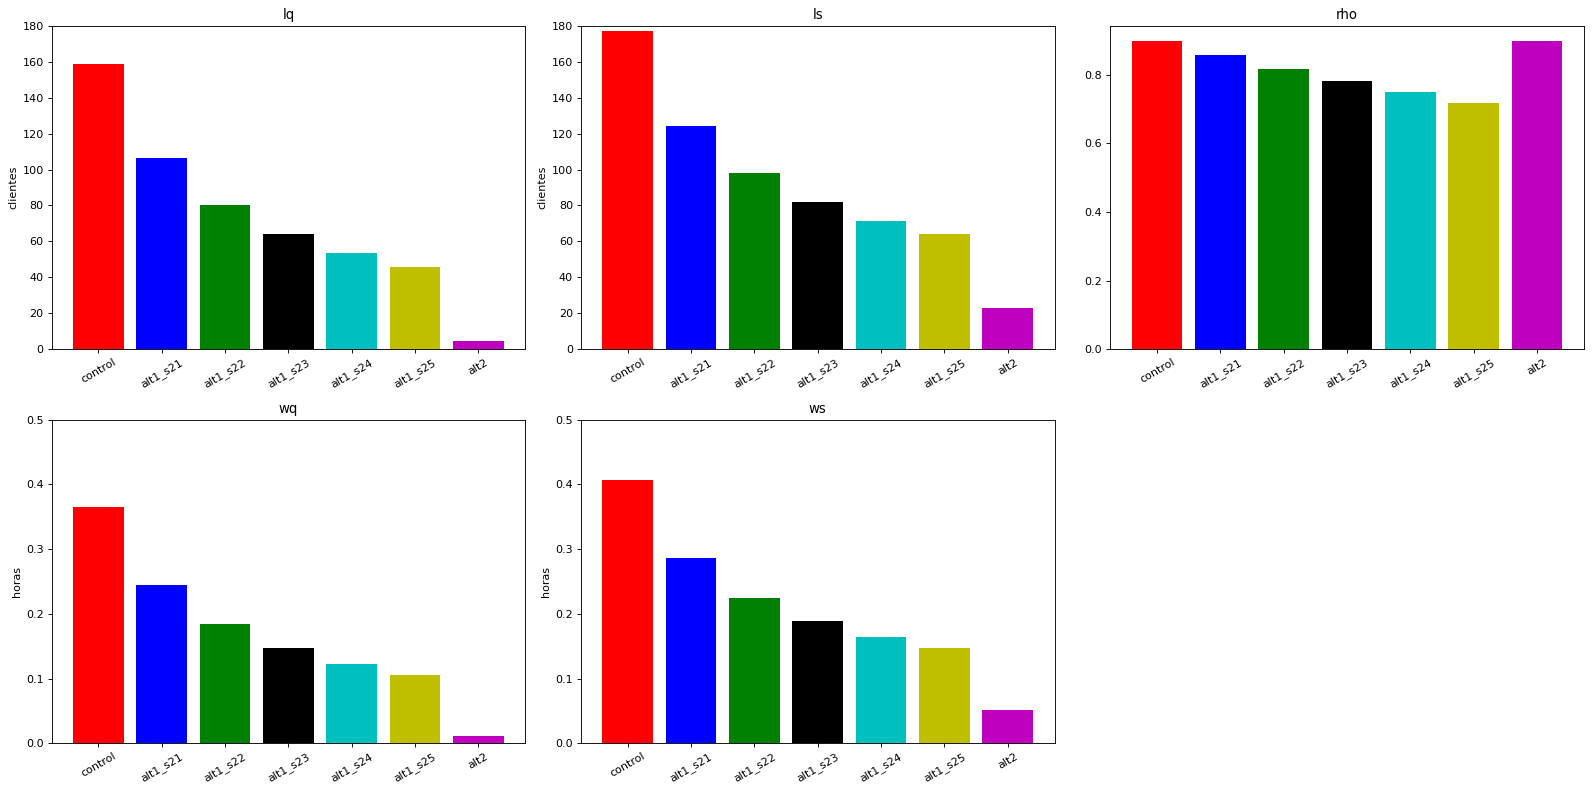

In [9]:
# Resultados para parámetros de filas:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

for key, idx in zip(["lq", "ls"], [231, 232]):
    plt.subplot(idx)
    plt.title(key)
    plt.ylabel('clientes')
    plt.xticks(rotation=30)
    plt.bar(result_df.index, result_df[key].values, color=['r','b','g','k','c', 'y', 'm'])
    plt.ylim(0, 180)
    
# Rho
plt.subplot(233)
plt.title("rho")
plt.xticks(rotation=30)
plt.bar(result_df.index, result_df["rho"].values, color=['r','b','g','k','c', 'y', 'm'])

# Tiempo de espera
for key, idx in zip(["wq", "ws"], [234, 235]):
    plt.subplot(idx)
    plt.title(key)
    plt.ylabel('horas')
    plt.xticks(rotation=30)
    plt.bar(result_df.index, result_df[key].values, color=['r','b','g','k','c', 'y', 'm'])
    plt.ylim(0, 0.5)
    
plt.tight_layout()
plt.show()
    


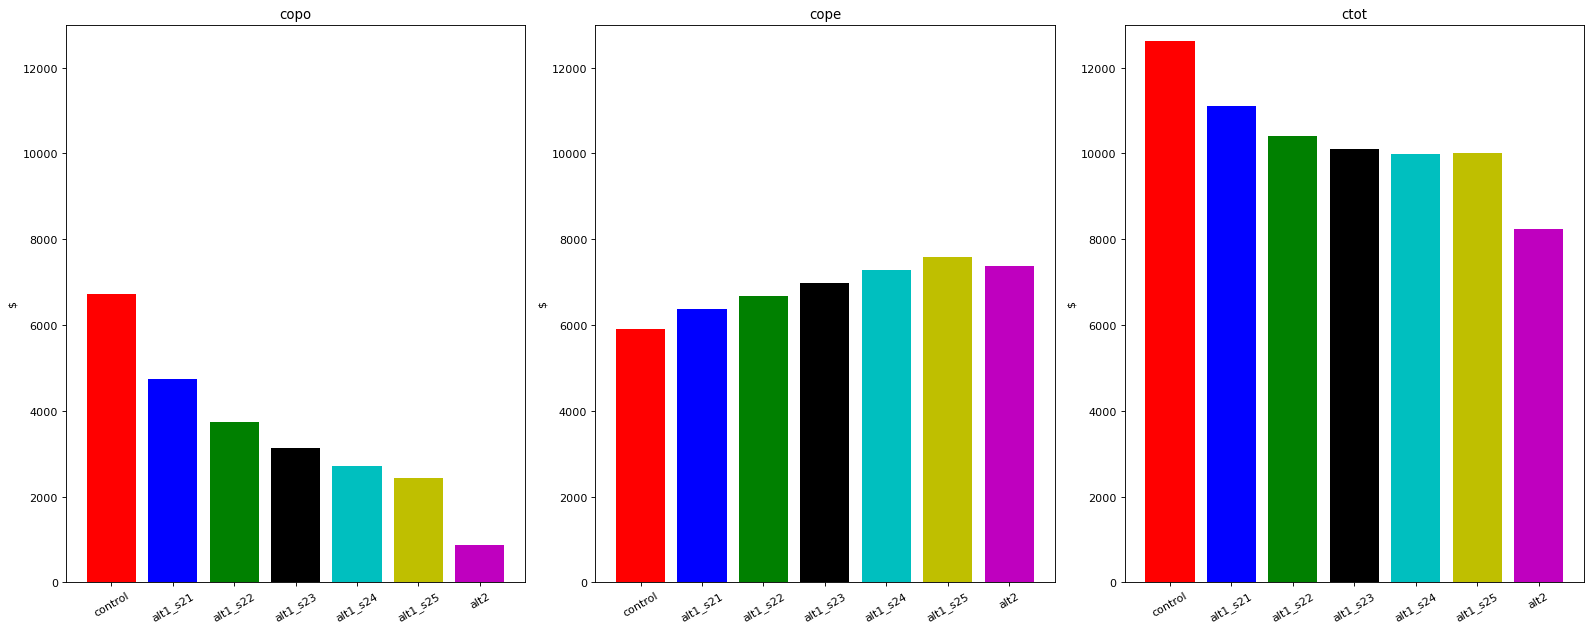

In [10]:
# Resultados para costos:

plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

for key, idx in zip(["copo", "cope", "ctot"], list(range(131, 134))):

    plt.subplot(idx)
    plt.title(key)
    plt.xticks(rotation=30)
    plt.bar(result_df.index, result_df[key].values, color=['r','b','g','k','c', 'y', 'm'])
    plt.ylim(0, 13000)
    plt.ylabel('$')

plt.tight_layout()

plt.show()

A continuación variamos el parámetro de llegadas para encontrar el impacto en cada métrica de los dos sistemas de filas. Particularmente queremos ver en para qué lambda es mejor un sistema sobre otro.